In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

cereal = pd.read_csv(r'C:\Users\awizz\Storytelling_skills_cereal\cereal.csv')

# Explore

In [2]:
cereal.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [3]:
cereal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


In [4]:
cereal.isnull().sum()

name        0
mfr         0
type        0
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       0
sugars      0
potass      0
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64

In [5]:
cereal['mfr'] = cereal['mfr'].map({'N':"Nabisco","Q":"Quaker Oats","K":"Kelloggs","R":"Ralston Purina","G":"General Mills","P":"Post"})
cereal.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,Nabisco,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Quaker Oats,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,Kelloggs,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,Kelloggs,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,Ralston Purina,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [6]:
cereal=cereal.replace(-1,0)
cereal.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.610390,6.935065,96.103896,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,4.232257,4.422840,71.251147,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


# Seperate into Good/Bad

In [7]:
cereal['Good'] = cereal.loc[:,['protein','fiber','potass']].mean(axis=1)
cereal['Bad'] = cereal.loc[:,['fat','sodium','calories','carbo', 'sugars']].mean(axis=1)
cereal.head()


,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,Good,Bad
0,100% Bran,Nabisco,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973,98.000000,42.4
1,100% Natural Bran,Quaker Oats,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679,46.666667,31.2
2,All-Bran,Kelloggs,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505,111.000000,68.6
3,All-Bran with Extra Fiber,Kelloggs,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912,116.000000,39.6
4,Almond Delight,Ralston Purina,C,110,2,2,200,1.0,14.0,8,0,25,3,1.0,0.75,34.384843,1.000000,66.8


In [8]:
high = cereal[cereal['rating']>50]
low= cereal[cereal['rating']<=50]



In [9]:
cereal.sort_values('Good',ascending=False)

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,Good,Bad
3,All-Bran with Extra Fiber,Kelloggs,C,50,4,0,140,14.0,8.0,0,330,25,3,1.00,0.50,93.704912,116.000000,39.6
2,All-Bran,Kelloggs,C,70,4,1,260,9.0,7.0,5,320,25,3,1.00,0.33,59.425505,111.000000,68.6
0,100% Bran,Nabisco,C,70,4,1,130,10.0,5.0,6,280,25,3,1.00,0.33,68.402973,98.000000,42.4
52,Post Nat. Raisin Bran,Post,C,120,3,1,200,6.0,11.0,14,260,25,3,1.33,0.67,37.840594,89.666667,69.2
58,Raisin Bran,Kelloggs,C,120,3,1,210,5.0,14.0,12,240,25,2,1.33,0.75,39.259197,82.666667,71.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,Trix,General Mills,C,110,1,1,140,0.0,13.0,12,25,25,2,1.00,1.00,27.753301,8.666667,55.2
17,Corn Pops,Kelloggs,C,110,1,0,90,1.0,13.0,12,20,25,2,1.00,1.00,35.782791,7.333333,45.0
54,Puffed Rice,Quaker Oats,C,50,1,0,0,0.0,13.0,0,15,0,3,0.50,1.00,60.756112,5.333333,12.6
20,Cream of Wheat (Quick),Nabisco,H,100,3,0,80,1.0,21.0,0,0,0,2,1.00,1.00,64.533816,1.333333,40.2


# Seperate by manufacturer

In [10]:
kellogg=cereal[cereal['mfr']=='Kelloggs']
kellogg.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,Good,Bad
count,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000
mean,108.695652,2.652174,0.608696,174.782609,2.739130,15.130435,7.565217,103.043478,34.782609,2.347826,1.077826,0.796087,44.038462,36.144928,61.356522
std,22.218818,1.070628,0.838783,84.132988,3.193991,4.465060,4.500768,91.982448,25.826267,0.775107,0.154830,0.209778,14.457434,31.843498,17.985950
min,50.000000,1.000000,0.000000,0.000000,0.000000,7.000000,0.000000,20.000000,25.000000,1.000000,1.000000,0.330000,29.924285,7.333333,22.200000
25%,100.000000,2.000000,0.000000,132.500000,1.000000,12.000000,3.000000,35.000000,25.000000,2.000000,1.000000,0.670000,34.478442,12.500000,52.000000
50%,110.000000,3.000000,0.000000,170.000000,1.000000,15.000000,7.000000,60.000000,25.000000,3.000000,1.000000,0.750000,40.560159,21.000000,67.000000
75%,115.000000,3.000000,1.000000,225.000000,3.000000,19.000000,12.000000,145.000000,25.000000,3.000000,1.000000,1.000000,50.013484,50.333333,71.600000
max,160.000000,6.000000,3.000000,320.000000,14.000000,22.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.000000,93.704912,116.000000,88.600000


In [11]:
American=cereal[cereal['mfr']=='A']
American


,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,Good,Bad


In [12]:
cereal=cereal.drop(cereal.index[43],axis=0)
cereal['mfr'].unique()


array(['Nabisco', 'Quaker Oats', 'Kelloggs', 'Ralston Purina',
       'General Mills', 'Post'], dtype=object)

In [13]:
gen_mill=cereal[cereal['mfr']=='General Mills']
gen_mill.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,Good,Bad
count,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000
mean,111.363636,2.318182,1.363636,200.454545,1.272727,14.727273,7.954545,85.227273,35.227273,2.136364,1.049091,0.875000,34.485852,29.606061,67.172727
std,10.371873,1.129111,0.581087,44.021345,1.241421,3.347804,3.872704,45.682060,26.343756,0.833550,0.132446,0.240906,8.946704,15.808757,9.216609
min,100.000000,1.000000,1.000000,140.000000,0.000000,10.500000,1.000000,25.000000,25.000000,1.000000,1.000000,0.500000,19.823573,8.666667,52.100000
25%,110.000000,2.000000,1.000000,180.000000,0.000000,12.000000,3.750000,55.000000,25.000000,1.250000,1.000000,0.750000,27.963172,18.750000,63.050000
50%,110.000000,2.000000,1.000000,200.000000,1.500000,14.250000,8.500000,80.000000,25.000000,2.000000,1.000000,0.875000,36.181877,27.916667,66.050000
75%,110.000000,3.000000,2.000000,217.500000,2.000000,16.750000,10.000000,108.750000,25.000000,3.000000,1.000000,1.000000,39.587829,38.416667,73.200000
max,140.000000,6.000000,3.000000,290.000000,4.000000,21.000000,14.000000,230.000000,100.000000,3.000000,1.500000,1.500000,51.592193,79.000000,84.000000


In [14]:
nabisco=cereal[cereal['mfr']=='Nabisco']
nabisco.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,Good,Bad
count,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
mean,86.666667,2.833333,0.166667,37.500000,4.000000,16.000000,1.833333,120.833333,8.333333,1.666667,0.971667,0.778333,67.968567,42.555556,28.433333
std,10.327956,0.752773,0.408248,54.931776,3.098387,5.865151,2.857738,91.565095,12.909944,0.816497,0.069402,0.272721,5.509326,31.682218,10.158281
min,70.000000,2.000000,0.000000,0.000000,1.000000,5.000000,0.000000,0.000000,0.000000,1.000000,0.830000,0.330000,59.363993,1.333333,19.200000
25%,82.500000,2.250000,0.000000,0.000000,3.000000,15.250000,0.000000,91.250000,0.000000,1.000000,1.000000,0.670000,65.459333,32.083333,21.850000
50%,90.000000,3.000000,0.000000,7.500000,3.000000,17.500000,0.000000,107.500000,0.000000,1.500000,1.000000,0.835000,68.319429,37.666667,23.500000
75%,90.000000,3.000000,0.000000,63.750000,3.750000,19.750000,3.750000,135.000000,18.750000,2.000000,1.000000,1.000000,71.702084,47.250000,36.400000
max,100.000000,4.000000,1.000000,130.000000,10.000000,21.000000,6.000000,280.000000,25.000000,3.000000,1.000000,1.000000,74.472949,98.000000,42.400000


In [15]:
post=cereal[cereal['mfr']=='Post']
post.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,Good,Bad
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.0,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,108.888889,2.444444,0.888889,146.111111,2.777778,13.222222,8.777778,113.888889,25.0,2.444444,1.064444,0.714444,41.705744,39.703704,55.577778
std,10.540926,0.881917,1.054093,55.157602,2.333333,1.922094,4.576510,83.470720,0.0,0.881917,0.129433,0.317101,10.047647,28.773756,11.069979
min,90.000000,1.000000,0.000000,45.000000,0.000000,11.000000,3.000000,25.000000,25.0,1.000000,1.000000,0.250000,28.025765,8.666667,34.200000
25%,100.000000,2.000000,0.000000,135.000000,0.000000,12.000000,5.000000,40.000000,25.0,2.000000,1.000000,0.670000,35.252444,14.000000,52.200000
50%,110.000000,3.000000,1.000000,160.000000,3.000000,13.000000,10.000000,90.000000,25.0,3.000000,1.000000,0.670000,40.917047,32.000000,60.000000
75%,120.000000,3.000000,1.000000,180.000000,5.000000,14.000000,12.000000,190.000000,25.0,3.000000,1.000000,0.880000,52.076897,66.000000,63.000000
max,120.000000,3.000000,3.000000,210.000000,6.000000,17.000000,15.000000,260.000000,25.0,3.000000,1.330000,1.330000,53.371007,89.666667,69.200000


In [16]:
quaker=cereal[cereal['mfr']=='Quaker Oats']
quaker.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,Good,Bad
count,8.000000,8.00000,8.000000,8.000000,8.000000,8.00000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
mean,95.000000,2.62500,1.750000,92.500000,1.337500,10.12500,5.375000,74.375000,12.500000,2.375000,0.875000,0.823750,42.915990,26.112500,40.950000
std,29.277002,1.59799,1.581139,99.498744,0.998481,4.48609,4.926242,43.378525,13.363062,0.744024,0.231455,0.200637,16.797673,15.216000,25.359754
min,50.000000,1.00000,0.000000,0.000000,0.000000,0.00000,0.000000,15.000000,0.000000,1.000000,0.500000,0.500000,18.042851,5.333333,12.000000
25%,87.500000,1.00000,0.750000,0.000000,0.750000,9.50000,0.000000,42.500000,0.000000,2.000000,0.875000,0.670000,30.955582,14.750000,18.450000
50%,100.000000,2.50000,2.000000,75.000000,1.500000,12.00000,6.000000,72.500000,12.500000,2.500000,1.000000,0.875000,47.419974,25.666667,41.200000
75%,120.000000,4.00000,2.000000,167.500000,2.000000,12.25000,8.750000,110.000000,25.000000,3.000000,1.000000,1.000000,53.310322,38.808333,58.750000
max,120.000000,5.00000,5.000000,220.000000,2.700000,14.00000,12.000000,135.000000,25.000000,3.000000,1.000000,1.000000,63.005645,46.666667,73.200000


In [17]:
ralston=cereal[cereal['mfr']=='Ralston Purina']
ralston.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,Good,Bad
count,8.000000,8.000000,8.00000,8.000000,8.000000,8.000000,8.000000,8.000000,8.0,8.000000,8.0,8.000000,8.000000,8.00000,8.000000
mean,115.000000,2.500000,1.25000,198.125000,1.875000,17.625000,6.125000,89.375000,25.0,2.000000,1.0,0.871250,41.542997,31.25000,67.625000
std,22.677868,1.069045,1.28174,56.690734,1.552648,3.248626,3.563205,66.194384,0.0,1.069045,0.0,0.180114,6.080841,22.79498,8.557995
min,90.000000,1.000000,0.00000,95.000000,0.000000,14.000000,2.000000,0.000000,25.0,1.000000,1.0,0.670000,34.139765,1.00000,55.000000
25%,100.000000,2.000000,0.00000,180.000000,0.750000,15.750000,3.000000,28.750000,25.0,1.000000,1.0,0.730000,36.448858,10.00000,62.550000
50%,110.000000,2.000000,1.00000,200.000000,2.000000,16.500000,5.500000,97.500000,25.0,2.000000,1.0,0.875000,41.721976,34.00000,66.400000
75%,120.000000,3.250000,2.25000,232.500000,3.000000,19.000000,8.750000,136.250000,25.0,3.000000,1.0,1.000000,45.528205,47.50000,71.400000
max,150.000000,4.000000,3.00000,280.000000,4.000000,23.000000,11.000000,170.000000,25.0,3.000000,1.0,1.130000,49.787445,59.00000,83.000000


# Averages - Bar plots

In [18]:
kellogg_n=kellogg['name']
nabisco_avg=nabisco.drop(['name','mfr','type','weight','cups','shelf'],axis=1).reset_index(drop=True).mean()
quaker_avg=quaker.drop(['name','mfr','type','weight','cups','shelf'],axis=1).reset_index(drop=True).mean()
ralston_avg=ralston.drop(['name','mfr','type','weight','cups','shelf'],axis=1).reset_index(drop=True).mean()
gen_mill_avg=gen_mill.drop(['name','mfr','type','weight','cups','shelf'],axis=1).reset_index(drop=True).mean()
post_avg=post.drop(['name','mfr','type','weight','cups','shelf'],axis=1).reset_index(drop=True).mean()




kellogg_avg=kellogg.drop(['name','mfr','type','weight','cups','shelf'],axis=1).reset_index(drop=True).mean()
nabisco_avg=nabisco.drop(['name','mfr','type','weight','cups','shelf'],axis=1).reset_index(drop=True).mean()
quaker_avg=quaker.drop(['name','mfr','type','weight','cups','shelf'],axis=1).reset_index(drop=True).mean()
ralston_avg=ralston.drop(['name','mfr','type','weight','cups','shelf'],axis=1).reset_index(drop=True).mean()
gen_mill_avg=gen_mill.drop(['name','mfr','type','weight','cups','shelf'],axis=1).reset_index(drop=True).mean()
post_avg=post.drop(['name','mfr','type','weight','cups','shelf'],axis=1).reset_index(drop=True).mean()

avg={"Kellogg":kellogg_avg,"Nabisco":nabisco_avg,'Quaker Oats':quaker_avg,"Ralston Purina":ralston_avg,"General Mills":gen_mill_avg,"Post":post_avg}
average=pd.DataFrame.from_dict(avg).T
average.reset_index(inplace=True)
average = average.rename(columns = {'index':'name'})

average 


,name,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,rating,Good,Bad
0,Kellogg,108.695652,2.652174,0.608696,174.782609,2.739130,15.130435,7.565217,103.043478,34.782609,44.038462,36.144928,61.356522
1,Nabisco,86.666667,2.833333,0.166667,37.500000,4.000000,16.000000,1.833333,120.833333,8.333333,67.968567,42.555556,28.433333
2,Quaker Oats,95.000000,2.625000,1.750000,92.500000,1.337500,10.125000,5.375000,74.375000,12.500000,42.915990,26.112500,40.950000
3,Ralston Purina,115.000000,2.500000,1.250000,198.125000,1.875000,17.625000,6.125000,89.375000,25.000000,41.542997,31.250000,67.625000
4,General Mills,111.363636,2.318182,1.363636,200.454545,1.272727,14.727273,7.954545,85.227273,35.227273,34.485852,29.606061,67.172727
5,Post,108.888889,2.444444,0.888889,146.111111,2.777778,13.222222,8.777778,113.888889,25.000000,41.705744,39.703704,55.577778


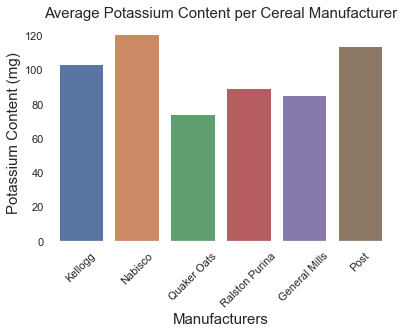

In [19]:
sns.set(rc={'axes.facecolor':'w', 'figure.facecolor':'w'})
sns.barplot(x='name',y='potass',data=average)
plt.xlabel('Manufacturers',fontsize=15)
plt.ylabel('Potassium Content (mg)',fontsize=15)
plt.title("Average Potassium Content per Cereal Manufacturer",fontsize=15)
plt.xticks(rotation=45)
plt.show()

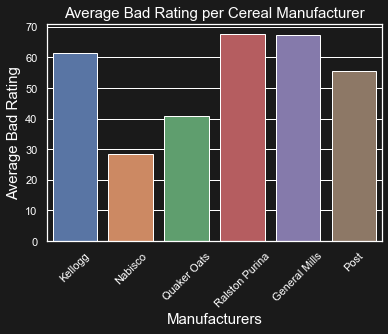

In [20]:
sns.set(rc={'axes.facecolor':'k', 'figure.facecolor':'k'})
sns.barplot(x='name',y='Bad',data=average)
plt.xlabel('Manufacturers',fontsize=15,color='w')
plt.ylabel('Average Bad Rating',fontsize=15,color='w')
plt.title("Average Bad Rating per Cereal Manufacturer",fontsize=15,color='w')
plt.xticks(rotation=45,color='w')
plt.yticks(color='w')
plt.show()

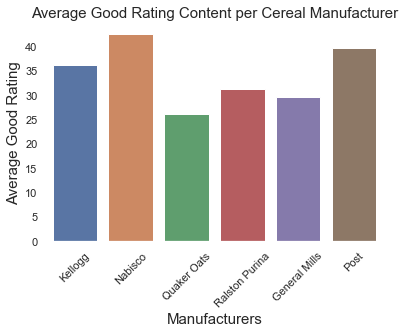

In [21]:

sns.set(rc={'axes.facecolor':'w', 'figure.facecolor':'w'})
sns.barplot(x='name',y='Good',data=average)
plt.xlabel('Manufacturers',fontsize=15)
plt.ylabel('Average Good Rating',fontsize=15)
plt.title("Average Good Rating Content per Cereal Manufacturer",fontsize=15)
plt.xticks(rotation=45)
plt.show()

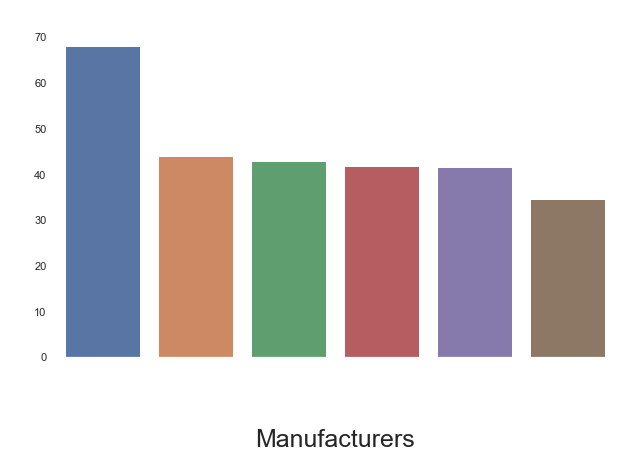

In [22]:
plt.figure(figsize=(10,6))
sns.barplot(x='name',y='rating',data=average,order=average.sort_values('rating',ascending=False).name)
plt.xlabel('Manufacturers',fontsize=25)
plt.ylabel('Rating (Average)',fontsize=25,color='w')
plt.title("Average Rating per Cereal Manufacturer",fontsize=25,color='w')
plt.xticks(rotation=45,color='w')
plt.show()

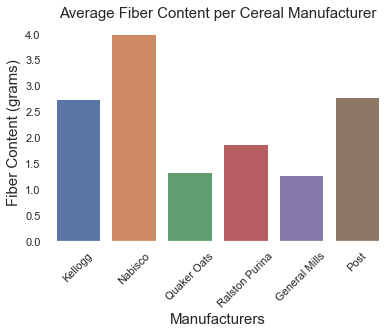

In [23]:
sns.set(rc={'axes.facecolor':'w', 'figure.facecolor':'w'})
sns.barplot(x='name',y='fiber',data=average)
plt.xlabel('Manufacturers',fontsize=15)
plt.ylabel('Fiber Content (grams)',fontsize=15)
plt.title("Average Fiber Content per Cereal Manufacturer",fontsize=15)
plt.xticks(rotation=45)
plt.show()

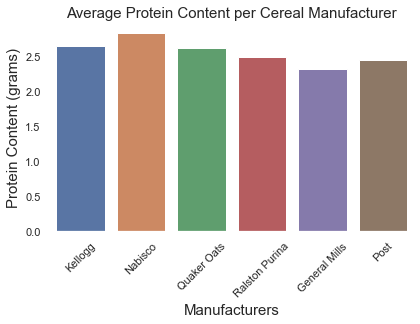

In [24]:
sns.set(rc={'axes.facecolor':'w', 'figure.facecolor':'w'})
sns.barplot(x='name',y='protein',data=average)
plt.xlabel('Manufacturers',fontsize=15)
plt.ylabel('Protein Content (grams)',fontsize=15)
plt.title("Average Protein Content per Cereal Manufacturer",fontsize=15)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

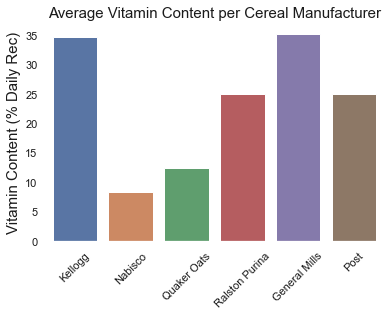

In [25]:
sns.set(rc={'axes.facecolor':'w', 'figure.facecolor':'w'})
sns.barplot(x='name',y='vitamins',data=average)
plt.xlabel('Manufacturers',fontsize=15,color='w')
plt.ylabel('Vitamin Content (% Daily Rec)',fontsize=15,color='k')
plt.title("Average Vitamin Content per Cereal Manufacturer",fontsize=15,color='k')
plt.xticks(rotation=45,color='k')
plt.yticks(color='k')
plt.show()

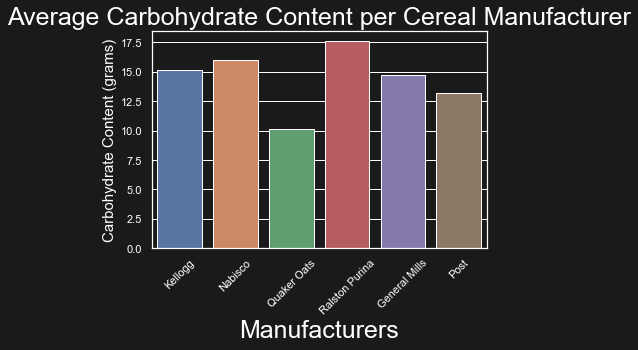

In [26]:
sns.set(rc={'axes.facecolor':'k', 'figure.facecolor':'k'})
sns.barplot(x='name',y='carbo',data=average)
plt.xlabel('Manufacturers',fontsize=25,color='w')
plt.ylabel('Carbohydrate Content (grams)',fontsize=15,color='w')
plt.title("Average Carbohydrate Content per Cereal Manufacturer",fontsize=25,color='w')
plt.xticks(rotation=45,color='w')
plt.yticks(color='w')
plt.show()

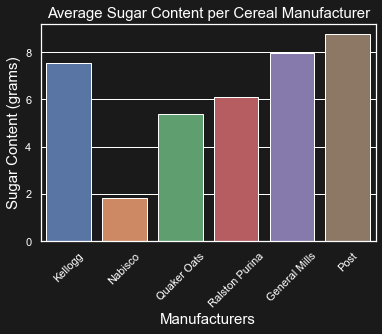

In [27]:
sns.set(rc={'axes.facecolor':'k', 'figure.facecolor':'k'})
sns.barplot(x='name',y='sugars',data=average)
plt.xlabel('Manufacturers',fontsize=15,color='w')
plt.ylabel('Sugar Content (grams)',fontsize=15,color='w')
plt.title("Average Sugar Content per Cereal Manufacturer",fontsize=15,color='w')
plt.xticks(rotation=45,color='w')
plt.yticks(color='w')
plt.show()

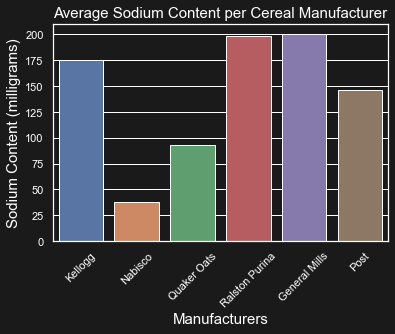

In [28]:
sns.set(rc={'axes.facecolor':'k', 'figure.facecolor':'k'})
sns.barplot(x='name',y='sodium',data=average)
plt.xlabel('Manufacturers',fontsize=15,color='w')
plt.ylabel('Sodium Content (milligrams)',fontsize=15,color='w')
plt.title("Average Sodium Content per Cereal Manufacturer",fontsize=15,color='w')
plt.xticks(rotation=45,color='w')
plt.yticks(color='w')
plt.show()

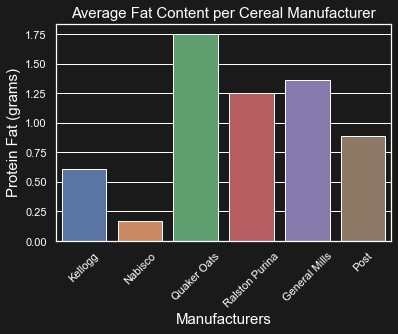

In [29]:
sns.set(rc={'axes.facecolor':'k', 'figure.facecolor':'k'})
sns.barplot(x='name',y='fat',data=average)
plt.xlabel('Manufacturers',fontsize=15,color='w')
plt.ylabel('Protein Fat (grams)',fontsize=15,color='w')
plt.title("Average Fat Content per Cereal Manufacturer",fontsize=15,color='w')
plt.xticks(rotation=45,color='w')
plt.yticks(color='w')
plt.show()

# Heatmap

<AxesSubplot:>

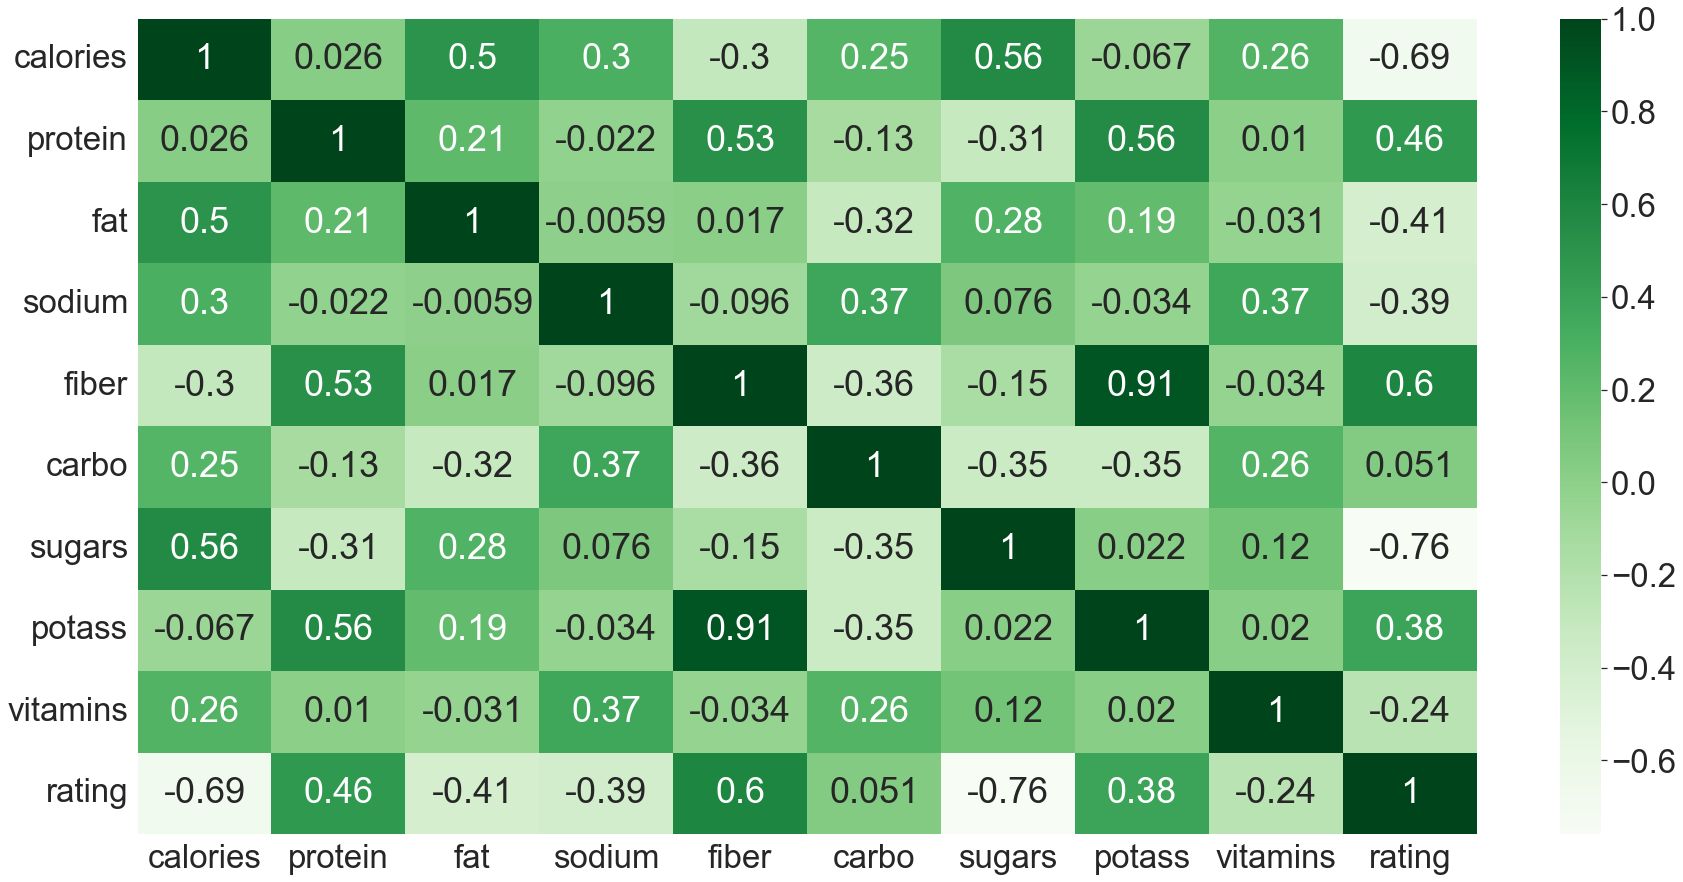

In [30]:
cereal_corr=cereal.drop(['weight','shelf','Good','Bad','cups',],axis=1)
sns.set(font_scale = 3)
plt.figure(figsize=(30,15))
sns.heatmap(cereal_corr.corr(),cmap="Greens",annot=True)

In [31]:
max_sugar= cereal.sort_values(by=['sugars'],ascending=False).head()
max_sugar

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,Good,Bad
66,Smacks,Kelloggs,C,110,2,1,70,1.0,9.0,15,40,25,2,1.00,0.75,31.230054,14.333333,41.0
30,Golden Crisp,Post,C,100,2,0,45,0.0,11.0,15,40,25,1,1.00,0.88,35.252444,14.000000,34.2
70,Total Raisin Bran,General Mills,C,140,3,1,190,4.0,15.0,14,230,100,3,1.50,1.00,28.592785,79.000000,72.0
52,Post Nat. Raisin Bran,Post,C,120,3,1,200,6.0,11.0,14,260,25,3,1.33,0.67,37.840594,89.666667,69.2
6,Apple Jacks,Kelloggs,C,110,2,0,125,1.0,11.0,14,30,25,2,1.00,1.00,33.174094,11.000000,52.0


In [32]:
min_carb=cereal.sort_values(by=['carbo']).head()
min_carb


,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,Good,Bad
57,Quaker Oatmeal,Quaker Oats,H,100,5,2,0,2.7,0.0,0,110,0,1,1.0,0.67,50.828392,39.233333,20.4
0,100% Bran,Nabisco,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973,98.000000,42.4
2,All-Bran,Kelloggs,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505,111.000000,68.6
1,100% Natural Bran,Quaker Oats,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679,46.666667,31.2
3,All-Bran with Extra Fiber,Kelloggs,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912,116.000000,39.6


In [33]:
max_carb= cereal.sort_values(by=['carbo'],ascending=False).head()
max_carb

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,Good,Bad
61,Rice Chex,Ralston Purina,C,110,1,0,240,0.0,23.0,2,30,25,1,1.0,1.13,41.998933,10.333333,75.0
62,Rice Krispies,Kelloggs,C,110,2,0,290,0.0,22.0,3,35,25,1,1.0,1.00,40.560159,12.333333,85.0
15,Corn Chex,Ralston Purina,C,110,2,0,280,0.0,22.0,3,25,25,1,1.0,1.00,41.445019,9.000000,83.0
40,Kix,General Mills,C,110,2,1,260,0.0,21.0,3,40,25,2,1.0,1.50,39.241114,14.000000,79.0
21,Crispix,Kelloggs,C,110,2,0,220,1.0,21.0,3,30,25,3,1.0,1.00,46.895644,11.000000,70.8


In [34]:
min_calories=cereal.sort_values(by=['calories']).head()
min_calories


,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,Good,Bad
3,All-Bran with Extra Fiber,Kelloggs,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912,116.000000,39.6
55,Puffed Wheat,Quaker Oats,C,50,2,0,0,1.0,10.0,0,50,0,3,0.5,1.00,63.005645,17.666667,12.0
54,Puffed Rice,Quaker Oats,C,50,1,0,0,0.0,13.0,0,15,0,3,0.5,1.00,60.756112,5.333333,12.6
0,100% Bran,Nabisco,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973,98.000000,42.4
2,All-Bran,Kelloggs,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505,111.000000,68.6


In [35]:
max_calories=cereal.sort_values(by=['calories'],ascending=False).head()
max_calories


,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,Good,Bad
46,Mueslix Crispy Blend,Kelloggs,C,160,3,2,150,3.0,17.0,13,160,25,3,1.5,0.67,30.313351,55.333333,68.4
44,Muesli Raisins; Dates; & Almonds,Ralston Purina,C,150,4,3,95,3.0,16.0,11,170,25,3,1.0,1.00,37.136863,59.000000,55.0
45,Muesli Raisins; Peaches; & Pecans,Ralston Purina,C,150,4,3,150,3.0,16.0,11,170,25,3,1.0,1.00,34.139765,59.000000,66.0
70,Total Raisin Bran,General Mills,C,140,3,1,190,4.0,15.0,14,230,100,3,1.5,1.00,28.592785,79.000000,72.0
39,Just Right Fruit & Nut,Kelloggs,C,140,3,1,170,2.0,20.0,9,95,100,3,1.3,0.75,36.471512,33.333333,68.0


In [36]:
max_fiber=cereal.sort_values(by=['fiber'],ascending=False).head()
max_fiber


,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,Good,Bad
3,All-Bran with Extra Fiber,Kelloggs,C,50,4,0,140,14.0,8.0,0,330,25,3,1.00,0.50,93.704912,116.000000,39.6
0,100% Bran,Nabisco,C,70,4,1,130,10.0,5.0,6,280,25,3,1.00,0.33,68.402973,98.000000,42.4
2,All-Bran,Kelloggs,C,70,4,1,260,9.0,7.0,5,320,25,3,1.00,0.33,59.425505,111.000000,68.6
52,Post Nat. Raisin Bran,Post,C,120,3,1,200,6.0,11.0,14,260,25,3,1.33,0.67,37.840594,89.666667,69.2
9,Bran Flakes,Post,C,90,3,0,210,5.0,13.0,5,190,25,3,1.00,0.67,53.313813,66.000000,63.6


In [37]:
min_fiber=cereal.sort_values(by=['fiber']).head()
min_fiber


,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,Good,Bad
37,Honey-comb,Post,C,110,1,0,180,0.0,14.0,11,35,25,1,1.0,1.33,28.742414,12.000000,63.0
30,Golden Crisp,Post,C,100,2,0,45,0.0,11.0,15,40,25,1,1.0,0.88,35.252444,14.000000,34.2
31,Golden Grahams,General Mills,C,110,1,1,280,0.0,15.0,9,45,25,2,1.0,0.75,23.804043,15.333333,83.0
18,Count Chocula,General Mills,C,110,1,1,180,0.0,12.0,13,65,25,2,1.0,1.00,22.396513,22.000000,63.2
40,Kix,General Mills,C,110,2,1,260,0.0,21.0,3,40,25,2,1.0,1.50,39.241114,14.000000,79.0


In [38]:
max_sodium=cereal.sort_values(by=['sodium'],ascending=False).head()
max_sodium


,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,Good,Bad
53,Product 19,Kelloggs,C,100,3,0,320,1.0,20.0,3,45,100,3,1.0,1.00,41.503540,16.333333,88.6
62,Rice Krispies,Kelloggs,C,110,2,0,290,0.0,22.0,3,35,25,1,1.0,1.00,40.560159,12.333333,85.0
11,Cheerios,General Mills,C,110,6,2,290,2.0,17.0,1,105,25,1,1.0,1.25,50.764999,37.666667,84.0
16,Corn Flakes,Kelloggs,C,100,2,0,290,1.0,21.0,2,35,25,1,1.0,1.00,45.863324,12.666667,82.6
15,Corn Chex,Ralston Purina,C,110,2,0,280,0.0,22.0,3,25,25,1,1.0,1.00,41.445019,9.000000,83.0


In [39]:
min_sodium=cereal.sort_values(by=['sodium']).head()
min_sodium


,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,Good,Bad
54,Puffed Rice,Quaker Oats,C,50,1,0,0,0.0,13.0,0,15,0,3,0.5,1.00,60.756112,5.333333,12.6
55,Puffed Wheat,Quaker Oats,C,50,2,0,0,1.0,10.0,0,50,0,3,0.5,1.00,63.005645,17.666667,12.0
57,Quaker Oatmeal,Quaker Oats,H,100,5,2,0,2.7,0.0,0,110,0,1,1.0,0.67,50.828392,39.233333,20.4
26,Frosted Mini-Wheats,Kelloggs,C,100,3,0,0,3.0,14.0,7,100,25,2,1.0,0.80,58.345141,35.333333,24.2
60,Raisin Squares,Kelloggs,C,90,2,0,0,2.0,15.0,6,110,25,3,1.0,0.50,55.333142,38.000000,22.2


In [40]:
max_fat=cereal.sort_values(by=['fat'],ascending=False).head()
max_fat


,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,Good,Bad
1,100% Natural Bran,Quaker Oats,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679,46.666667,31.2
12,Cinnamon Toast Crunch,General Mills,C,120,1,3,210,0.0,13.0,9,45,25,2,1.0,0.75,19.823573,15.333333,71.0
34,Great Grains Pecan,Post,C,120,3,3,75,3.0,13.0,4,100,25,3,1.0,0.33,45.811716,35.333333,43.0
19,Cracklin' Oat Bran,Kelloggs,C,110,3,3,140,4.0,10.0,7,160,25,3,1.0,0.50,40.448772,55.666667,54.0
45,Muesli Raisins; Peaches; & Pecans,Ralston Purina,C,150,4,3,150,3.0,16.0,11,170,25,3,1.0,1.00,34.139765,59.000000,66.0


In [41]:
min_fat=cereal.sort_values(by=['fat']).head()
min_fat


,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,Good,Bad
37,Honey-comb,Post,C,110,1,0,180,0.0,14.0,11,35,25,1,1.0,1.33,28.742414,12.000000,63.0
20,Cream of Wheat (Quick),Nabisco,H,100,3,0,80,1.0,21.0,0,0,0,2,1.0,1.00,64.533816,1.333333,40.2
21,Crispix,Kelloggs,C,110,2,0,220,1.0,21.0,3,30,25,3,1.0,1.00,46.895644,11.000000,70.8
61,Rice Chex,Ralston Purina,C,110,1,0,240,0.0,23.0,2,30,25,1,1.0,1.13,41.998933,10.333333,75.0
23,Double Chex,Ralston Purina,C,100,2,0,190,1.0,18.0,5,80,25,3,1.0,0.75,44.330856,27.666667,62.6


In [42]:
max_potass=cereal.sort_values(by=['potass'],ascending=False).head()
max_potass


,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,Good,Bad
3,All-Bran with Extra Fiber,Kelloggs,C,50,4,0,140,14.0,8.0,0,330,25,3,1.00,0.50,93.704912,116.000000,39.6
2,All-Bran,Kelloggs,C,70,4,1,260,9.0,7.0,5,320,25,3,1.00,0.33,59.425505,111.000000,68.6
0,100% Bran,Nabisco,C,70,4,1,130,10.0,5.0,6,280,25,3,1.00,0.33,68.402973,98.000000,42.4
52,Post Nat. Raisin Bran,Post,C,120,3,1,200,6.0,11.0,14,260,25,3,1.33,0.67,37.840594,89.666667,69.2
58,Raisin Bran,Kelloggs,C,120,3,1,210,5.0,14.0,12,240,25,2,1.33,0.75,39.259197,82.666667,71.4


In [43]:
min_potass=cereal.sort_values(by=['potass']).head()
min_potass


,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,Good,Bad
4,Almond Delight,Ralston Purina,C,110,2,2,200,1.0,14.0,8,0,25,3,1.0,0.75,34.384843,1.000000,66.8
20,Cream of Wheat (Quick),Nabisco,H,100,3,0,80,1.0,21.0,0,0,0,2,1.0,1.00,64.533816,1.333333,40.2
54,Puffed Rice,Quaker Oats,C,50,1,0,0,0.0,13.0,0,15,0,3,0.5,1.00,60.756112,5.333333,12.6
17,Corn Pops,Kelloggs,C,110,1,0,90,1.0,13.0,12,20,25,2,1.0,1.00,35.782791,7.333333,45.0
15,Corn Chex,Ralston Purina,C,110,2,0,280,0.0,22.0,3,25,25,1,1.0,1.00,41.445019,9.000000,83.0


In [44]:
max_protein=cereal.sort_values(by=['protein'],ascending=False).head()
max_protein


,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,Good,Bad
11,Cheerios,General Mills,C,110,6,2,290,2.0,17.0,1,105,25,1,1.0,1.25,50.764999,37.666667,84.0
67,Special K,Kelloggs,C,110,6,0,230,1.0,16.0,3,55,25,1,1.0,1.00,53.131324,20.666667,71.8
57,Quaker Oatmeal,Quaker Oats,H,100,5,2,0,2.7,0.0,0,110,0,1,1.0,0.67,50.828392,39.233333,20.4
0,100% Bran,Nabisco,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973,98.000000,42.4
2,All-Bran,Kelloggs,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505,111.000000,68.6


In [45]:
min_protein=cereal.sort_values(by=['protein']).head()
min_protein


,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,Good,Bad
37,Honey-comb,Post,C,110,1,0,180,0.0,14.0,11,35,25,1,1.0,1.33,28.742414,12.000000,63.0
31,Golden Grahams,General Mills,C,110,1,1,280,0.0,15.0,9,45,25,2,1.0,0.75,23.804043,15.333333,83.0
35,Honey Graham Ohs,Quaker Oats,C,120,1,2,220,1.0,12.0,11,45,25,2,1.0,1.00,21.871292,15.666667,73.0
18,Count Chocula,General Mills,C,110,1,1,180,0.0,12.0,13,65,25,2,1.0,1.00,22.396513,22.000000,63.2
17,Corn Pops,Kelloggs,C,110,1,0,90,1.0,13.0,12,20,25,2,1.0,1.00,35.782791,7.333333,45.0


In [46]:
max_vitamin=cereal.sort_values(by=['vitamins'],ascending=False).head()
max_vitamin


,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,Good,Bad
38,Just Right Crunchy Nuggets,Kelloggs,C,110,2,1,170,1.0,17.0,6,60,100,3,1.0,1.0,36.523683,21.000000,60.8
71,Total Whole Grain,General Mills,C,100,3,1,200,3.0,16.0,3,110,100,3,1.0,1.0,46.658844,38.666667,64.0
69,Total Corn Flakes,General Mills,C,110,2,1,200,0.0,21.0,3,35,100,3,1.0,1.0,38.839746,12.333333,67.0
70,Total Raisin Bran,General Mills,C,140,3,1,190,4.0,15.0,14,230,100,3,1.5,1.0,28.592785,79.000000,72.0
53,Product 19,Kelloggs,C,100,3,0,320,1.0,20.0,3,45,100,3,1.0,1.0,41.503540,16.333333,88.6


In [47]:
min_vitamin=cereal.sort_values(by=['vitamins']).head()
min_vitamin


,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,Good,Bad
63,Shredded Wheat,Nabisco,C,80,2,0,0,3.0,16.0,0,95,0,1,0.83,1.00,68.235885,33.333333,19.2
55,Puffed Wheat,Quaker Oats,C,50,2,0,0,1.0,10.0,0,50,0,3,0.50,1.00,63.005645,17.666667,12.0
57,Quaker Oatmeal,Quaker Oats,H,100,5,2,0,2.7,0.0,0,110,0,1,1.00,0.67,50.828392,39.233333,20.4
54,Puffed Rice,Quaker Oats,C,50,1,0,0,0.0,13.0,0,15,0,3,0.50,1.00,60.756112,5.333333,12.6
64,Shredded Wheat 'n'Bran,Nabisco,C,90,3,0,0,4.0,19.0,0,140,0,1,1.00,0.67,74.472949,49.000000,21.8
